In [2]:
import numpy as np
import pandas as pd

In [3]:
import sklearn

print(sklearn.__version__)

0.20.3


# 첫 번째 머신러닝 - 붓꽃 품종 예측

In [5]:
from sklearn.datasets import load_iris
# 자체적으로 제공하는 데이터 세트를 생성하는 모듈 모임, 이 중에서 load_iris는 붓꽃 이미지 세트
from sklearn.tree import DecisionTreeClassifier
# sklearn.tree : 트리 기반 ML 알고리즘을 구현한 클래스의 모임
from sklearn.model_selection import train_test_split
# sklearn.model_selection : 학습/검증데이터 분리 or 평가 모듈 모임
# 최적의 하이퍼 파라미터로 평가하기 위한 다양한 모듈 모임.
# 하이퍼 파라미터 : ML 알고리즘에서 최적의 학습을 위해 직접 입력하는 파라미터
# ML 알고리즘의 성능 튜닝할 수 있다..
# 최적의 하이퍼 파라미터로 평가하기 위한이 무슨 의미인지 아직은 모르겠음.

# 붓꽃 데이터를 생성해서, DT를 이용해 분류하는 실습

In [24]:
# 붓꽃 데이터 세트 로딩
iris = load_iris()

# iris.data : 피처만으로 된 데이터 (쉽게 말하면 X변수들), np array로 되어 있다.
iris_data = iris.data

# iris.target : 레이블(결정 값, y변수) 데이터, np array로 되어 있다.
iris_label = iris.target
print('iris target values : ', iris_label)
print('iris target names : ', iris.target_names)

# 붓꽃 데이터 DataFrame으로 변환
iris_df = pd.DataFrame(iris_data, columns = iris.feature_names)
iris_df['label'] = iris_label
iris_df.head(3)

iris target values :  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
iris target names :  ['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [26]:
# train/test data set 분리
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_label, test_size = 0.2,
                                                    random_state = 11)
# train_test_split(x배열, y배열, test_size=num)과 같은 모양으로 하고
# 반환은 x배열을 나눈 2개와 y배열을 나눈 2개가 들어있는 리스트로 만들어짐.

In [12]:
# 피처 데이터와 레이블 데이터를 모두 numpy array로 넣었음. df 넣어도 되는지 확인해봄
dfx_train, dfx_test, dfy_train, dfy_test = train_test_split(iris_df[iris.feature_names],
                                                            iris_df['label'], 
                                                            test_size = 0.2, 
                                                            random_state = 11)
# 해봤는데 되긴 됩니다

In [27]:
# decision tree classifier객체 생성

dt_clf = DecisionTreeClassifier(random_state=11) # random_state는 없어도 됨, 실습을 위해

In [28]:
# 학습수행
dt_clf.fit(X_train, y_train) 
# 이러면 dt_clf의 파라미터가 트레인 데이터에 적응된다.

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=11,
            splitter='best')

In [29]:
# 학습 완료된 dt_clf에서 predict()를 이용해서 테스트 데이터 결과 확인
pred = dt_clf.predict(X_test)

In [31]:
# 예측 성능 평가 : 정확도 측정하기.
from sklearn.metrics import accuracy_score
print('예측 정확도 : {0:.4f}'.format(accuracy_score(y_test, pred)))
# label 데이터를 왼쪽에, predicted data를 오른쪽에 넣었음

예측 정확도 : 0.9333


In [17]:
# 1. 데이터 세트 분리
# 2. 모델 학습(.fit(X_train, y_train))
# 3. 예측 수행(.pred(X_test))
# 4. 평가(accuracy_score(y_test, pred))

# 사이킷런의 기반 프레임워크

In [32]:
# 지도학습 - Classification, Regression . 두 가지 지도학습 사이킷런 클래스를 Estimator
# 라고 한다. 지도학습의 모든 알고리즘을 구현한 클래스 통칭함
# Estimator 클래스는 fit(), predict() 메소드를 다 가지고 있다.

# cross_val_score()와 같은 evaluation 함수나,
# GridSearchCV와 같은 하이퍼 파리미터 튜닝을 지원하는 클래스
# : 인자를 Estimator로 받음.
# 인자로 받은 Estimator에 대해서 위의 평가함수나 그리드서치함수에서 fit, predict를 호출해서 평가
# or 파라미터 튜닝을 수행함.

# 비지도학습에서는 fit(), transform() 메소드를 적용. 이거는 비지도학습 때 다시 보기로

## sklearn 주요 모듈
#### 예제 데이터
- sklearn.datasets # 예시 파일들

#### 피처 처리(전처리)
- sklearn.preprocessing # 문자열 숫자형으로, 정규화, 스케일링 등 전처리 과정
- sklearn.feature_selection # 변수 선택(더 중요한 변수 선택하는 기법).
- sklearn.feature_extraction # 변수 추출.. 텍스트 데이터, 이미지 데이터 어쩌구 아직은 모름

#### 피처 처리(차원 축소)
- sklearn.decomposition # 차원 축소 관련 (PCA, NMF, Truncated SVD)

#### 데이터 분리, 검증, 파라미터 튜닝
- sklearn.model_selection # 학습용/테스트용 데이터 분리, 그리드 서치로 최적 하이퍼 파라미터 추출

#### 평가
- sklearn.metrics # 평가 기법(성능 측정 방법)

#### ML 알고리즘들
- sklearn.ensemble # 앙상블 알고리즘 (여러 개 묶어서 알고리즘 짜는거)
- sklearn.linear_model # 선형 회귀, 릿지, 라쏘, 로지스틱 회귀 등.
- sklearn.naive_bayes # 나이브 베이즈 알고리즘, 가우시안 NB, 다항 분포 NB
- sklearn.neighbors # 최근접 이웃 알고리즘 (kNN 등)
- sklearn.svm # 서포트 벡터 머신
- sklearn.tree # 결정트리
- sklearn.cluster # 비지도 클러스터링 알고리즘 (Kmeans, 계층형, DBSCAN..)

#### 유틸리티 ( 뭐에 써먹는것? 모름)
- sklearn.pipeline # 피처 처리 등. 변환과 ML알고리즘 학습, 예측 유틸리티 제공.

In [33]:
# 내장형 예제데이터 세트:
# load_로 시작하는 것들 : 용량 작은거
# fetch_로 시작하는 것들 : 용량 커서 인터넷에서 받아오는 거
# make_로 시작하는 것들 : 표본 생성기, 분류나 클러스터링을 위한 데이터 세트를 무작위 생성(연습용)

In [35]:
from sklearn.datasets import load_iris

iris_data = load_iris()
print(type(iris_data))

<class 'sklearn.utils.Bunch'>


In [36]:
keys= iris_data.keys()
print(keys)

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [43]:
# x 변수들 이름 (features)
print(type(iris_data.feature_names))
print(len(iris_data.feature_names))
print(iris_data.feature_names, '\n')
# y변수의 카테고리들 이름 (label category 이름들)
print(type(iris_data.target_names))
print(len(iris_data.target_names))
print(iris_data.target_names, '\n')
# x 변수 데이터
print(type(iris_data.data))
print(iris_data.data.shape)
print(iris_data.data, '\n')
# y 변수 데이터, label values.
print(type(iris_data.target))
print(iris_data.target.shape)
print(iris_data.target)

<class 'list'>
4
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'] 

<class 'numpy.ndarray'>
3
['setosa' 'versicolor' 'virginica'] 

<class 'numpy.ndarray'>
(150, 4)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4

# Model Selection 모듈

## 1. train_test_split()

In [51]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

iris = load_iris()
dt_clf = DecisionTreeClassifier()

# train set과 test set을 나누지 않고 fit
train_data = iris.data
train_label = iris.target
dt_clf.fit(train_data, train_label)

# 학습 데이터 세트로 예측
pred = dt_clf.predict(train_data)
print("정확도 :", accuracy_score(train_label, pred))

# 정확도가 1.0, 100%가 나옴.
# dt_clf는 이미 train set에 최적으로 맞추어져 있으니
# train set을 넣으면 무조건 정답을 맞출 수밖에 없다.

정확도 : 1.0


In [52]:
from sklearn.model_selection import train_test_split

dt_clf = DecisionTreeClassifier()
iris_data = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target,
                                                    test_size = 0.3, random_state = 121)

In [53]:
# 학습 데이터로 학습한 후, test 데이터로 정확도를 측정해 본다.

dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
print("예측 정확도 : {0:.4f}".format(accuracy_score(y_test, pred)))

예측 정확도 : 0.9556


## 2. 교차검증
과적합 : 모델이 학습 데이터에만 과도하게 최적화되어 실제 예측을 다른 데이터로 할 경우 성능이 떨어지는 것.
고정된 학습 데이터와 테스트 데이터로 평가를 하다 보면, 테스트 데이터에만 최적의 성능을 발휘하게 편향되는 경우가 생긴다.
==> 해당 test data에만 과적합됨.

=> 교차 검증을 이용해 다양하게 학습하고 평가한다

- 교차검증을 통해 모든 데이터가 학습에도 사용되며, 동시에 검증에도 사용된다.
- 대부분의 ML모델 성능 평가 : 교차 검증으로 1차 평가 후, 최종적으로 테스트 데이터 세트에 적용 평가

In [55]:
# K fold 교차 검증 : 데이터를 K개의 subset으로 나눈다.
# 데이터 K개 세트가 각각 한 번씩 검증 데이터가 되어서 K번 학습/검증을 시행
# K개의 평가를 평균한 결과를 가지고 예측 성능 평가.
# KFold , StratifiedKFold(계층화?)

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import numpy as np

iris = load_iris()
features = iris.data
label = iris.target
dt_clf = DecisionTreeClassifier()

# 5개 폴드 세트로 분리하는 KFold객체, 폴드 세트별 정확도 담는 리스트 객체 생성
kfold = KFold(n_splits = 5)
cv_accuracy = []
print("붓꽃데이터 세트 크기 :", features.shape[0])

붓꽃데이터 세트 크기 : 150


In [58]:
# kfold.split은 어떤 모양의 데이터를 반환하는지?
# (train_index1, test_index1), (train_index2, test_index2), ... , (train_index5, test_index5)
# 튜플 묶음이 K번
list(kfold.split(features))

[(array([ 30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,
          43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
          56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,
          69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,
          82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,
          95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107,
         108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120,
         121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133,
         134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146,
         147, 148, 149]),
  array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
         17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])),
 (array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
          13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
          26,  27, 

In [62]:
n_iter = 0
for train_index, test_index in kfold.split(features):
    # kfold.split()으로 반환된 인덱스를 이용해서 학습용, 검증용 데이터 추출하기.
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]
    # 학습, 예측
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    n_iter+=1
    # 반복할 때매다 정확도 측정
    accuracy = np.round(accuracy_score(y_test, pred), 4) # 소수점 4번째 자리까지 반올림표시
    train_size = X_train.shape
    test_size = X_test.shape
    print("{0}번째 교차검증 정확도 : {1}, 학습 데이터 크기 : \
          {2}, 검증 데이터 크기 : {3}".format(n_iter, accuracy, train_size, test_size))
    print("#{0} 검증 세트 인덱스 : {1}".format(n_iter, test_index))
    cv_accuracy.append(accuracy)
    

# iteration accuracy 평균내기
print("\n 평균 검증 정확도 : ", np.mean(cv_accuracy))

1번째 교차검증 정확도 : 1.0, 학습 데이터 크기 :           (120, 4), 검증 데이터 크기 : (30, 4)
#1 검증 세트 인덱스 : [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]
2번째 교차검증 정확도 : 0.9667, 학습 데이터 크기 :           (120, 4), 검증 데이터 크기 : (30, 4)
#2 검증 세트 인덱스 : [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]
3번째 교차검증 정확도 : 0.8333, 학습 데이터 크기 :           (120, 4), 검증 데이터 크기 : (30, 4)
#3 검증 세트 인덱스 : [60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 85 86 87 88 89]
4번째 교차검증 정확도 : 0.9333, 학습 데이터 크기 :           (120, 4), 검증 데이터 크기 : (30, 4)
#4 검증 세트 인덱스 : [ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119]
5번째 교차검증 정확도 : 0.7333, 학습 데이터 크기 :           (120, 4), 검증 데이터 크기 : (30, 4)
#5 검증 세트 인덱스 : [120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]

 평균 검증 정확도 :  0.90665999999

#### StratifiedKFold 
데이터 label 집합에서 특정 레이블이 특이하게 많거나 적어서, 값 분포가 한쪽으로 치우칠 때 사용
대출 사기(1), 정상 대출(0) 구별하는 모델 예시. 대출 사기는 매우 적고 정상 대출은 많아서, 0, 1 비율을 제대로 반영하지 못한다.

StratifedKFold는 원본 데이터의 레이블 분포를 먼저 고려하고 나서, 이 분포와 동일한 분포로 학습/검증 데이터 분배한다.

In [71]:
# 붓꽃 데이터 그냥 KFold하기
from sklearn.datasets import load_iris

iris = load_iris()
x_iris = iris.data
y_iris = iris.target
iris_df = pd.DataFrame(x_iris, columns = iris.feature_names)
iris_df['label'] = y_iris

kfold = KFold(n_splits = 3)
for train_index, test_index in kfold.split(iris_df): # split 안에는 x_iris, y_iris, iris_df..\
    # 여튼 index가 있는 것들이면 다 가능한 듯
    label_train = iris_df['label'].iloc[train_index].value_counts()
    label_test = iris_df['label'].iloc[test_index].value_counts()
    print(train_values)
    print(test_values, '\n')

1    50
0    50
Name: label, dtype: int64
2    50
Name: label, dtype: int64 

1    50
0    50
Name: label, dtype: int64
2    50
Name: label, dtype: int64 

1    50
0    50
Name: label, dtype: int64
2    50
Name: label, dtype: int64 



In [72]:
# stratified kfold 사용

from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits = 3)
n_iter = 0

for train_index, test_index in skf.split(iris_df, y_iris):
    n_iter += 1
    label_train = iris_df['label'].iloc[train_index].value_counts()
    label_test = iris_df['label'].iloc[test_index].value_counts()
    print("{}번째 교차검증".format(n_iter))
    print(label_train)
    print(label_test)

1번째 교차검증
2    33
1    33
0    33
Name: label, dtype: int64
2    17
1    17
0    17
Name: label, dtype: int64
2번째 교차검증
2    33
1    33
0    33
Name: label, dtype: int64
2    17
1    17
0    17
Name: label, dtype: int64
3번째 교차검증
2    34
1    34
0    34
Name: label, dtype: int64
2    16
1    16
0    16
Name: label, dtype: int64


In [76]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

iris = load_iris()
# X데이터 따로, y데이터 따로의 np array를 미리 만들어 놓는 게 좋을 듯.
features = iris.data
target = iris.target
iris_df = pd.DataFrame(features, columns = iris.feature_names)
iris_df['label'] = target

dt_clf = DecisionTreeClassifier(random_state = 156)

skfold = StratifiedKFold(n_splits = 3)
n_iter = 0
cv_accuracy = []

for train_idx, test_idx in skfold.split(iris_df, iris_df['label']):
    ## skfold(iris_df, iris_df.label)이 아니고.
    ## skfold.split(iris_df, iris_df.label)입니다..헷갈리지 마세요
    X_train, X_test = features[train_idx], features[test_idx]
    y_train, y_test = target[train_idx], target[test_idx]
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    accuracy = np.round(accuracy_score(y_test, pred), 4)  # 소수점 4번째 자리까지 표시
    cv_accuracy.append(accuracy)
    n_iter += 1
    print("{}번째 교차검증 정확도 : ".format(n_iter), accuracy)

print("교차검증 정확도 평균 : ", np.mean(cv_accuracy))

1번째 교차검증 정확도 :  0.9804
2번째 교차검증 정확도 :  0.9216
3번째 교차검증 정확도 :  0.9792
교차검증 정확도 평균 :  0.9604


## 분류에서 거의 웬만하면 무조건 St.KFold 써라
## 회귀에서는 St.KFold가 의미가 없으니 KFold 써라

## 위와 같은 교차 검증 간편하게 해주는 API : cross_val_score()

cross_val_score() 선언 형태 :

cross_val_score(estimator, X, y=None, scoring=None, cv=None, .....)

위의 5개 항목이 주요 파라미터

- estimator : 어떤 모델을 돌릴 것인지.
- X : 피처 데이터 세트
- y : 레이블 데이터
- scoring : 예측 성능 평가 지표(위의 경우 accuracy_score였음)
- cv : 교차 검증 폴드 수
- 회귀에선 KFold, 분류에선 StratifiedKFold를 사용해서 교차검증해 준다.

In [79]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_validate
# cross_validate : 여러 개의 평가 지표 활용 가능. 어떻게 쓰는지 파라미터 확인해보기
from sklearn.datasets import load_iris

iris_data = load_iris()
dt_clf = DecisionTreeClassifier()

data = iris_data.data
label = iris_data.target
iris_df = pd.DataFrame(iris_data.data, columns = iris_data.feature_names)
iris_df['label'] = label

scores = cross_val_score(dt_clf, data, label, scoring = 'accuracy', cv= 3)
# scoring에 뭐가 들어갈 수 있는지 확인해보기.
print('교차검증별 정확도 : ', np.round(scores, 4))
print('평균검증정확도 : ', np.round(np.mean(scores), 4))

교차검증별 정확도 :  [0.9804 0.9216 0.9792]
평균검증정확도 :  0.9604


## GridSearchCV

하이퍼 파라미터 튜닝 방안. 아직 하이퍼 파라미터는 배우지 않았는데 그래도 선행학습 차원에서

- 하이퍼 파라미터 : 머신러닝 알고리즘을 구성하는 주요 구성 요소.
- 이 값을 조절해 알고리즘의 예측 성능을 개선할 수 있다.
- Classifier, Regressor와 같은 알고리즘에 사용되는 하이퍼 파라미터를 순차적으로 입력하면서 최적의 파라미터 도출 방안을 제공한다.
- Grid(격자), 촘촘하게 파라미터 입력하면서 테스트하는 방식.
- 결정트리 알고리즘의 파라미터를 순차적으로 변경하면서 최고 성능의 파라미터 조합을 찾으려면.

- 교차 검증 기반으로 하이퍼 파라미터의 최적값을 찾는다.
- 데이터 세트를 cross-val 위한 학습/테스트 세트로 자동 분할한 뒤에, 모든 파라미터 순차 적용해 최적 파라미터. 수행시간이 상대적으로 오래 걸린다.
- 5회에 걸쳐 하이퍼 파리미터 변경하면서, 수행 성능 측정. CV가 3회라면, 3개의 폴딩 세트를 3회에 걸쳐 학습.
- CV 3, 하이퍼 파라미터 6개 조합이면 총 18번 학습/평가 이뤄진다.

#### GridSarchCV 생성자

- estimator : classifier, regressor, pipeline. 무슨 모델 사용할 것인지
- param_grid : 파라미터명, 사용될 파라미터값
- scoring : 평가 방법 지정, accuracy 문자열 또는 성능평가함수로 지정
- cv : 교차 검증 분할 개수 지정
- refit : True 생성시 가장 최적의 하이퍼 파라미터를 찾고 나서 estimator객체를 해당 하이퍼 파라미터로 재학습.

In [1]:
grid_parameters = {'max_depth':[1,2,3], 'min_samples_split': [2,3]}
# max_depth : 트리 깊이가 어느정도 깊이일지.
# min_samples_split은 아직 모르겠음

# for문으로 파라미터를 하나하나 바꿔가면서 해야 하는 걸 API로 간편하게 사용 가능.

In [5]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

# 데이터 로딩, 학습/테스트 분리.
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size = 0.2,
                                                    random_state = 121)
dtree = DecisionTreeClassifier()

### 파라미터 : 딕셔너리 형태로
parameters = {'max_depth' : [1, 2, 3], 'min_samples_split' : [2, 3]}

In [6]:
import pandas as pd

# 3개의 train, test set fold로 나누어 테스트 수행
### refit = True가 디폴트, True면 가장 좋은 파라미터로 재 학습
grid_dtree = GridSearchCV(dtree, param_grid = parameters, cv = 3, refit = True)
# GridSearchCV 객체 생성한 뒤,

# 붓꽃 학습 데이터와 GridSearchCV.fit()메소드 이용해서 하이퍼파라미터 순차적 학습/평가.
grid_dtree.fit(X_train, y_train)

# 결과 추출해서 DataFrame으로 변환
scores_df = pd.DataFrame(grid_dtree.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score',
           'split0_test_score', 'split1_test_score', 'split2_test_score']]


C:\Users\frank\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\frank\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\frank\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\frank\Anaconda3\lib\site-packages\sklearn\util

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.700000,5,0.700,0.7,0.70
1,"{'max_depth': 1, 'min_samples_split': 3}",0.700000,5,0.700,0.7,0.70
2,"{'max_depth': 2, 'min_samples_split': 2}",0.958333,3,0.925,1.0,0.95
3,"{'max_depth': 2, 'min_samples_split': 3}",0.958333,3,0.925,1.0,0.95
4,"{'max_depth': 3, 'min_samples_split': 2}",0.975000,1,0.975,1.0,0.95
5,"{'max_depth': 3, 'min_samples_split': 3}",0.975000,1,0.975,1.0,0.95


In [7]:
print(grid_dtree.best_params_)
print(grid_dtree.best_score_)

{'max_depth': 3, 'min_samples_split': 2}
0.975


In [9]:
from sklearn.metrics import accuracy_score

estimator = grid_dtree.best_estimator_

pred = estimator.predict(X_test)
print(accuracy_score(y_test, pred))

0.9666666666666667


## 일반적으로 __학습 데이터를 GridSearchCV를 이용해 최적 하이퍼 파라미터 튜닝을 수행__하고 나서, __별도의 테스트 세트에서 이를 평가__한다.

# 데이터 전처리

- Null 값 : Column 다 버리기에는 너무 중요한 데이터인데, 그렇기엔 Null값이 좀 많은 경우 대체값을 확실하게 잘 찾아야 함. 애매해서 어려움
- 문자열 값 : Sklearn ML은 문자열을 입력값으로 허용하지 않는다. -> 인코딩을 통해 숫자형으로 변환되어야 함.
- 문자열 피처 : 카테고리형 피처(코드값), 텍스트형 피처(피처 벡터화, 또는 불필요한 피처를 삭제)를 의미
- 식별자 문자열 피처와 같은 경우는 인코딩하지 않고 삭제. 굳이 필요가 없음 예측에 중요하지 않으니까

### 데이터 인코딩
- 레이블 인코딩, 원-핫 인코딩이 있다.
- 레이블 인코딩 : 카테고리 피쳐를 코드형 숫자값으로 변환 (숫자형 값으로 변환되어야 함)
- ex) TV 냉장고 전자레인지 -> 카테고리 1, 2, 3

In [10]:
# 레이블 인코딩 : LabelEncoder 클래스로 구현

from sklearn.preprocessing import LabelEncoder

items = ['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']

# LabelEncoder 객체 생성 후, fit(), transform() 으로 레이블 인코딩
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
print('인코딩 변환값 : ', labels)

인코딩 변환값 :  [0 1 4 5 3 3 2 2]


In [11]:
print(encoder.classes_)

['TV' '냉장고' '믹서' '선풍기' '전자레인지' '컴퓨터']


In [12]:
print('원본값:', encoder.inverse_transform([4, 5, 2, 0, 1, 1, 3, 3]))

원본값: ['전자레인지' '컴퓨터' '믹서' 'TV' '냉장고' '냉장고' '선풍기' '선풍기']


#### 주의 : 숫자형 값으로 변환되기 때문에 선형회귀 같은 데에서 컬럼을 숫자형 데이터로 인식해서 특정 카테고리에 가중치가 부여되는 등의 문제가 있을 수 있음, 그래서 이걸 해결하기 위한 인코딩으로 원-핫 인코딩을 함
- 원-핫 인코딩 : 피처 값 유형에 따라 새로운 피쳐 추가해서, 고유 값에 해당하는 칼럼에만 1 표시하고 나머지 칼럼에는 0을 표시하는 방식.
- 행 형태로 되어 있는 피처의 고유값을 열 형태로 변환한 뒤, 고유값에 해당하는 칼럼에만......
- -> 카테고리 변수를 더미변수를 이용해서 변환하는 방식
- 주의점 : OneHotEncoder 변환 전에 모든 문자열 값이 숫자형 값으로 변환되어야 함.(LabelEncoder 먼저 사용하고 그 뒤에 사용하는듯)
- 주의점2 : 입력값으로 2차원 데이터가 필요

In [13]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import numpy as np

items = ['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']

# 숫자값으로 변환을 위해 LabelEncoder 변환
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
# 2차원 데이터 변환
labels = labels.reshape(-1, 1)

# One-Hot Encoding 적용
oh_encoder = OneHotEncoder()
oh_encoder.fit(labels)
oh_labels = oh_encoder.transform(labels)
print('원핫인코딩데이터')
print(oh_labels.toarray())
print('원핫인코딩데이터차원')
print(oh_labels.shape)

원핫인코딩데이터
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
원핫인코딩데이터차원
(8, 6)


C:\Users\frank\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [15]:
# pandas의 get_dummies()
# 이게 더쉬워보임

import pandas as pd

df = pd.DataFrame({'item':items})
pd.get_dummies(df)

,item_TV,item_냉장고,item_믹서,item_선풍기,item_전자레인지,item_컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,0,1,0,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0


#### 피처 스케일링, 정규화

- 표준화(Standardization), 정규화(Normalization)
- 표준화는 표준정규분포를 따르게 변환하는 것.
- 정규화는 최소 0~ 최대 1의 값을 가지도록 min max 변화시켜주는 것.

- 사이킷런에서 Normalizer 모듈은 선형대수 정규화 개념으로, 개별 벡터의 크기를 맞추기 위해 변환하는 것을 의미함.
- 표준화 정규화는 한 개의 컬럼에 대해서, 사이킷런의 Normalizer는 동시에 여러 개의 컬럼에 대해서 진행하는 정규화라고 생각할수 있을듯

In [17]:
# 1. StandardScaler (가우시안 분포 만들기)
# SVM, 선형회귀, 로지스틱 회귀 는 데이터가 가우시안 분포를 가지고 있다고 가정하고 구현되었다.
# 사전에 표준화 적용하는 것이 중요한 요소가 됨.

from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(data=iris.data, columns = iris.feature_names)

print('feature 평균값\n', iris_df.mean())
print('feature 분산값\n', iris_df.var())

feature 평균값
 sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64
feature 분산값
 sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

iris_df_scaled = pd.DataFrame(iris_scaled, columns = iris.feature_names)
print('feature 평균값')
print(iris_df_scaled.mean())
print('feature 분산값')
print(iris_df_scaled.var())

feature 평균값
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64
feature 분산값
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


In [19]:
# 2. MinMaxScaler
# 0~1사이의 값으로 변환(음수값이 있으면 -1~1사이로 변환)
# 데이터 분포가 가우시안이 아닐 경우 Min, Max Scale 적용.

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

iris_df_scaled = pd.DataFrame(iris_scaled, columns = iris.feature_names)
print('feature 최솟값')
print(iris_df_scaled.min())
print('feature 최댓값')
print(iris_df_scaled.max())

feature 최솟값
sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64
feature 최댓값
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


## 학습 데이터, 테스트 데이터의 스케일링 변환시 유의점

- fit(), transform(), fit_transform() 을 이용.
- fit() : 객체에 데이터 변환 기준 정보 설정.
- transform() : 설정된 정보를 이용해 데이터를 변환
- fit_transform() : 한번에 해줌

- 그러니까 처음에 학습 데이터 할때는 fit_transform() 해도 되는데, 테스트 데이터를 학습 데이터와 같은 식으로 데이터 변환하려면 fit_transform()이 아니라 transform()만 해야된다!!! fit_transform()하면 테스트 데이터에 맞춘 새로운 스케일링 정보가 저장되어서 그걸로 스케일링되기 때문에 모델이 달라진다.


##### 주의사항 정리
- __전체 데이터를 스케일링 변환한 뒤 학습-테스트 데이터로 분리할 것__
- __그게 안 되면 적어도 fit_transform()을 테스트 데이터에 사용하지 말 것.__

## 사이킷런 - 타이타닉 생존자 예측하기

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

titanic_df = pd.read_csv('titanic/titanic_train.csv')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [22]:
# 학습 데이터 정보
print(titanic_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


In [23]:
# null값 : Age, Cabin, Embarked에 있다.
# Age는 평균 나이로, Cabin과 Embarked는 N이라는 문자로 변경한다.
titanic_df.Age.fillna(titanic_df.Age.mean(), inplace= True)
titanic_df.Cabin.fillna('N', inplace = True)
titanic_df.Embarked.fillna('N', inplace = True)
titanic_df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [25]:
# 문자열 피쳐 : Sex, Cabin, Embarked. 값 분류 얼마나 되는지 보자.

print(titanic_df.Sex.value_counts())
print(titanic_df.Cabin.value_counts())
print(titanic_df.Embarked.value_counts())

male      577
female    314
Name: Sex, dtype: int64
N              687
C23 C25 C27      4
B96 B98          4
G6               4
E101             3
F2               3
D                3
C22 C26          3
F33              3
E67              2
B20              2
C123             2
E121             2
D20              2
D26              2
D33              2
C65              2
D17              2
F G73            2
C78              2
B51 B53 B55      2
B49              2
C2               2
E24              2
C83              2
D36              2
C52              2
C124             2
E8               2
E25              2
              ... 
D15              1
B80              1
B102             1
D21              1
F G63            1
B50              1
D46              1
C90              1
B4               1
C95              1
E58              1
C99              1
B3               1
B42              1
C49              1
C128             1
D11              1
E63              1
B82 B84          

In [26]:
# Sex와 Embarked는 카테고리로 되어 있음
# Cabin은 C23 C25 C27 이라는 값이나, F    0125 뭐이런것처럼 정리가 안되어 있다.
# Cabin은 선실 번호 중에서 선실 등급을 나타내는 첫 번째 알파벳이 중요할 것. ** 이런거

titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]
print(titanic_df.Cabin.head(3))

0    N
1    C
2    N
Name: Cabin, dtype: object


In [36]:
# 성별에 따른 생존자 수 비교

titanic_df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

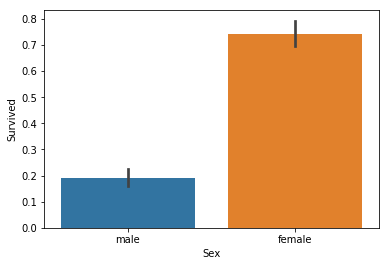

In [37]:
sns.barplot(x='Sex', y='Survived', data=titanic_df)

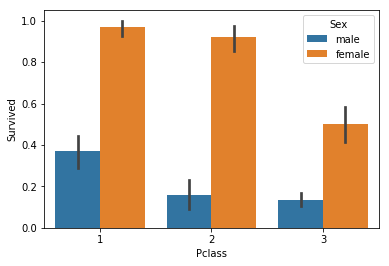

In [38]:
sns.barplot(x='Pclass', y='Survived', hue='Sex', data = titanic_df)

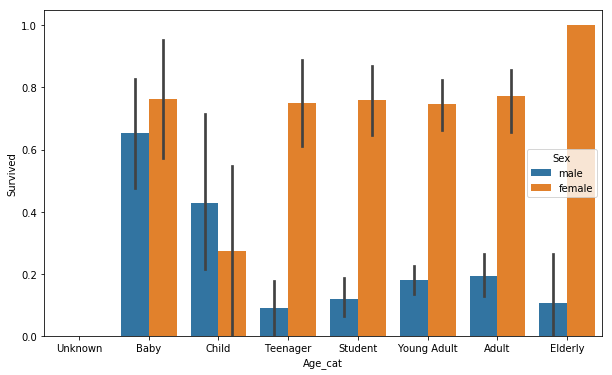

In [40]:
def get_category(age):
    cat = ''
    if age <= -1 : cat = 'Unknown'
    elif age <= 5 : cat = 'Baby'
    elif age <= 12 : cat = 'Child'
    elif age <= 18 : cat = 'Teenager'
    elif age <= 25 : cat = 'Student'
    elif age <= 35 : cat = 'Young Adult'
    elif age <= 60 : cat = 'Adult'
    else : cat = 'Elderly'
        
    return cat


plt.figure(figsize = (10,6))

group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 
               'Elderly']


titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x: get_category(x))
sns.barplot(x='Age_cat', y='Survived', hue='Sex', data=titanic_df, order = group_names)
titanic_df.drop('Age_cat', axis = 1, inplace=True)

In [41]:
# 문자열 카테고리를 숫자형으로 변환하기 : LabelEncoder 이용.
# 여러 칼럼을 encode_features()함수를 생성해서 한 번에 변환한다.

from sklearn import preprocessing

def encode_features(dataDF):
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
        
    return dataDF

titanic_df = encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


In [42]:
# 처음부터, 이 과정을 한번에 하는 함수 만들어서 df를 이 함수에 적용시켰음

def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace = True)
    df['Cabin'].fillna('N', inplace = True)
    df['Embarked'].fillna('N', inplace = True)
    df['Fare'].fillna(0, inplace = True)
    return df
    
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis = 1, inplace = True)
    return df

def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df


def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [43]:
titanic_df = pd.read_csv('titanic/titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop(['Survived'], axis = 1, inplace = False)

X_titanic_df = transform_features(X_titanic_df)

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df,
                                                    test_size = 0.2, random_state = 11)

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 각 객체 생성
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression()

# DT 학습/예측 평가
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print(np.round(accuracy, 4))

# RF 학습
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print(np.round(accuracy, 4))

# LR 학습
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print(np.round(accuracy, 4))

0.7877
0.8324
0.8659


C:\Users\frank\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\frank\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [49]:
# KFold를 사용해서 예측해보기

from sklearn.model_selection import KFold

def exec_kfold(clf, folds = 5):
    kfold = KFold(n_splits = folds)
    scores = []
    
    for iter_count, (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
        
        X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
        y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]
        
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        scores.append(accuracy)
        print("교차검증 {}번째 정확도 : {:.4f}".format(iter_count, accuracy))
        
    mean_score = np.mean(scores)
    print("평균정확도 : {:.4}".format(mean_score))

exec_kfold(dt_clf, folds=5)
exec_kfold(rf_clf, folds=5)
exec_kfold(lr_clf, folds=5)

교차검증 0번째 정확도 : 0.7542
교차검증 1번째 정확도 : 0.7809
교차검증 2번째 정확도 : 0.7865
교차검증 3번째 정확도 : 0.7697
교차검증 4번째 정확도 : 0.8202
평균정확도 : 0.7823
교차검증 0번째 정확도 : 0.7989
교차검증 1번째 정확도 : 0.7640
교차검증 2번째 정확도 : 0.8202
교차검증 3번째 정확도 : 0.7921
교차검증 4번째 정확도 : 0.8315
평균정확도 : 0.8013
교차검증 0번째 정확도 : 0.7933
교차검증 1번째 정확도 : 0.7921
교차검증 2번째 정확도 : 0.7753
교차검증 3번째 정확도 : 0.7472
교차검증 4번째 정확도 : 0.8427
평균정확도 : 0.7901


C:\Users\frank\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\frank\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\frank\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\frank\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\frank\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

In [51]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, X_titanic_df, y_titanic_df, cv=5)
for iter_count, accuracy in enumerate(scores):
    print("교차검증 {}번째 정확도 : {:.4f}".format(iter_count, accuracy))
    
print("평균정확도: {:.4f}".format(np.mean(scores)))

교차검증 0번째 정확도 : 0.7430
교차검증 1번째 정확도 : 0.7765
교차검증 2번째 정확도 : 0.7809
교차검증 3번째 정확도 : 0.7753
교차검증 4번째 정확도 : 0.8418
평균정확도: 0.7835


In [53]:
# GridSearchCV 사용

from sklearn.model_selection import GridSearchCV

parameters = {'max_depth' : [2, 3, 5, 10], 
              'min_samples_split' : [2, 3, 5],
              'min_samples_leaf' : [1, 5, 8]}

grid_dclf = GridSearchCV(dt_clf, param_grid = parameters, scoring = 'accuracy', cv = 5)
grid_dclf.fit(X_train, y_train)

print("최적하이퍼파라미터 : ", grid_dclf.best_params_)
print("최고정확도 : {:.4f}".format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test, dpredictions)
print("테스트세트 DTC정확도 : {:.4f}".format(accuracy))

최적하이퍼파라미터 :  {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
최고정확도 : 0.7992
테스트세트 DTC정확도 : 0.8715


C:\Users\frank\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
